# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

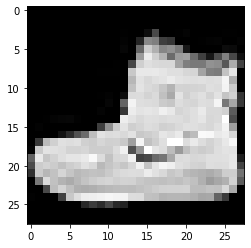

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###

image_vectors = training_images.reshape(training_images.shape[0], -1)
num_images = training_images.shape[0]
print("Conjunto entrenamiento:", num_images)


image_vectors = test_images.reshape(test_images.shape[0], -1)
num_images = test_images.shape[0]
print("Conjunto Test:", num_images)

image_size = training_images.shape[1:]
print("Tamaño de las imágenes en el conjunto:", image_size)

*Tu respuesta aquí* 

Se utiliza reshape para tranformar un conjunto de una matriz a un vector

El [0] significa que accedemos al primer elemento el cual corresponde a las imagenes

El [1:] significa que accedemos al segundo elemento el cual corresponde al tamaño alto x ancho en pixeles

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [6]:
### Tu código aquí ###
print(training_images.shape)

print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
np.set_printoptions(precision=1)
print(training_images[1])

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.7 0.4 0.2 0.2 0.2 0.3 0.7 0.5 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.5 0.9 0.8 0.9 0.9 1.  1.  1.  1.  0.9 0.8 1.  0.9 0.6 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.7 0.9 0.9 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.9 0.9 0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 0.9 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.9 0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.9 0.8 0.8 0.8 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.8 0.8 0.8 0.9 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.9 0.8 0.8 0.8 0.8 0.4 0.3 0.2 0.3 0.2 0.2 0.2 0.2 0.2 0.4 0.9 0.8 0.8 0.9 0.9 0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.9 0.8 0.8 0.8 0.8 0.  0.3 0.4 0.  0.4 0.2 0.3 0.3 0.2 0.  0.9 0.8 0.8 0.8 1.  0.1 0.  0. ]
 [0.  0.  0.  0.  1.  0.9 0.8 0.8 0.8 0.8 0.  1.  1.  0.5 1.  0.7 1.  1.  0.8 0.  0.8 0.9 0.8 0.8 0.9 0.4 0.  0. ]
 [0.  0.  0.  0.2 0.9 0.8 0.8 0.8 0.9 0.8 0.  0.2 0.1 0.2 0.1 0.1 0.  0.1 0.3 0.

In [13]:
training_images.dtype

dtype('float64')

In [14]:
training_images.size

47040000

In [15]:
training_images.ndim

3

*Tu respuesta aquí*

Por lo general el unint 8 almacena imagenes en escala de grises, cada pixel se representa en un solo byte por eso no vemos valores mayores a 256 que es el nivel de intensidad. 1 byte = 8 bits. Para el ejemplo anterior se puede observar que es una especie de bolso.

La propiedad training_images.size imprime el numero de dimensiones de la matriz

training_images.ndim Imprime el rango de valores en la matriz en este caso corresponde a 3 los cuales son imagen, alto y ancho

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [17]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5967 - accuracy: 0.8023
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4152 - accuracy: 0.8525
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3761 - accuracy: 0.8655
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8744
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8807
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3171 - accuracy: 0.8853
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3046 - accuracy: 0.8883
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2923 - accuracy: 0.8934
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2840 - accuracy: 0.8961
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2739 - accuracy: 0.8990

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

In [18]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

# Evaluar el modelo en el conjunto de entrenamiento
train_loss, train_acc = model.evaluate(training_images, training_labels)
print('Accuracy del conjunto de Entrenamiento:', train_acc)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy del conjunto de Test:', test_acc)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2631 - accuracy: 0.9046
Accuracy del conjunto de Entrenamiento: 0.9045500159263611
313/313 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8781
Accuracy del conjunto de Test: 0.8780999779701233



## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [19]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)
print(classifications[0])
print(classifications.shape)

313/313 [==============================] - 0s 1ms/step
[1.2e-05 2.7e-06 2.4e-05 2.1e-05 1.3e-05 7.8e-02 2.3e-05 4.7e-02 3.1e-04 8.7e-01]
(10000, 10)


In [20]:
rounded_classifications = np.round(classifications[0] * 100, 2)
print(rounded_classifications)
print("Clasificaciones de la primera imagen en el conjunto de prueba:")
for i in range(len(rounded_classifications)):
    print(f"Clase {i}: {rounded_classifications[i]:.2f}%")

[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 7.8e+00 0.0e+00 4.7e+00 3.0e-02 8.7e+01]
Clasificaciones de la primera imagen en el conjunto de prueba:
Clase 0: 0.00%
Clase 1: 0.00%
Clase 2: 0.00%
Clase 3: 0.00%
Clase 4: 0.00%
Clase 5: 7.79%
Clase 6: 0.00%
Clase 7: 4.69%
Clase 8: 0.03%
Clase 9: 87.48%


In [21]:
num_classes = len(np.unique(training_labels))
print("Número de clases:", num_classes)

Número de clases: 10


Tu respuesta a la pregunta 3.1 aquí: Estos vectores de numeros representan la probabilidad para cada clase que representa dicha imagen, por ejemplo yo puse para la imagen [0] que es la primera y use un redondeo de numpy para pasarlo a procentaje y mostrarlo de una manera más legible. Es decir por cada prediccion tiene 10 valores que son el número de etiquetas que existen.

Tu respuesta a la pregunta 3.2 aquí: En este caso dice que la imagen en cuestion tiene un 87% de probabilidad de pertenecer a la clase #9 es decir la última porque incia desde 0 La cual nos indica su clasificación

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

In [26]:
### Tu código para 512 neuronas aquí ###
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)

train_loss, train_acc = model.evaluate(training_images, training_labels)
print('Accuracy del conjunto de Entrenamiento:', train_acc)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy del conjunto de Test:', test_acc)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5286 - accuracy: 0.8149
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4024 - accuracy: 0.8546
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3637 - accuracy: 0.8677
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3354 - accuracy: 0.8780
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3174 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2982 - accuracy: 0.8902
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2842 - accuracy: 0.8949
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2679 - accuracy: 0.9011
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2562 - accuracy: 0.9047
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.90

In [27]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications.shape)
rounded_classifications = np.round(classifications[0] * 100, 2)
print(rounded_classifications)
print("Clasificaciones de la primera imagen en el conjunto de prueba:")
for i in range(len(rounded_classifications)):
    print(f"Clase {i}: {rounded_classifications[i]:.2f}%")

313/313 [==============================] - 0s 1ms/step
[5.0e-07 9.8e-09 2.8e-08 1.1e-08 3.2e-07 8.5e-04 2.5e-06 1.8e-03 2.3e-06 1.0e+00]
(10000, 10)
[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 9.0e-02 0.0e+00 1.8e-01 0.0e+00 1.0e+02]
Clasificaciones de la primera imagen en el conjunto de prueba:
Clase 0: 0.00%
Clase 1: 0.00%
Clase 2: 0.00%
Clase 3: 0.00%
Clase 4: 0.00%
Clase 5: 0.09%
Clase 6: 0.00%
Clase 7: 0.18%
Clase 8: 0.00%
Clase 9: 99.74%


In [28]:
### Tu código para 1024 neuronas aquí ###
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)

train_loss, train_acc = model.evaluate(training_images, training_labels)
print('Accuracy del conjunto de Entrenamiento:', train_acc)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy del conjunto de Test:', test_acc)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.5272 - accuracy: 0.8130
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4013 - accuracy: 0.8541
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3624 - accuracy: 0.8675
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3340 - accuracy: 0.8784
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3132 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2943 - accuracy: 0.8910
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2785 - accuracy: 0.8953
Epoch 8/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2612 - accuracy: 0.9015
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2472 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2310 - accurac

**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

#Tu respuesta a la pregunta 4.1 aquí:
Podemos observar que para este caso en particular la precisión con 128 y 512 neuronas es casi identica. 

Mientras que con 1024 neuronas si mejora el procentaje a un 88% en test. En cuanto al tiempo de ejecución para 


128 se demora aproximadamente 2s en cada epoch,

512 se demora aproximadamente 5s en cada epoch,

1024 se demora aproximadamente 5s en cada epoch,


Esto nos indica que para este problema en particular no hay una afectación relevante en tiempo, pero si tenemos un dataset muy grande 

puede llegar a ser un problema de recursos y el aumento de acuracy no es tan significativo en este caso.

In [29]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications.shape)
rounded_classifications = np.round(classifications[0] * 100, 2)
print(rounded_classifications)
print("Clasificaciones de la primera imagen en el conjunto de prueba:")
for i in range(len(rounded_classifications)):
    print(f"Clase {i}: {rounded_classifications[i]:.2f}%")

313/313 [==============================] - 1s 3ms/step
[1.1e-06 1.4e-08 2.8e-07 2.1e-08 5.5e-07 6.2e-03 4.5e-06 1.8e-03 4.8e-07 9.9e-01]
(10000, 10)
[ 0.   0.   0.   0.   0.   0.6  0.   0.2  0.  99.2]
Clasificaciones de la primera imagen en el conjunto de prueba:
Clase 0: 0.00%
Clase 1: 0.00%
Clase 2: 0.00%
Clase 3: 0.00%
Clase 4: 0.00%
Clase 5: 0.62%
Clase 6: 0.00%
Clase 7: 0.18%
Clase 8: 0.00%
Clase 9: 99.20%


Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [ ]:
### Tu código del clasificador de la pregunta 4 aquí ###

Tu respuesta a la pregunta 4.2 aquí:
En ambos casos está clasificando la primera imagen en la última clase, lo que diferencia ambas ejecuciones es la precisión o porcentaje de acierto para dicha clase. Donde con 128 neuronas nos dice que tiene un 88% de probabilidad de pertenecer a la ultima clase, mientras que con 512 y 102 tiene una clasificación del 99% en la ultima clase. 

Tu respuesta a la pregunta 4.3 aquí:
Esto ha ocurrido porque con más neuronas el modelo es capaz de identificar más patrones en las imagenes los cuales nos permiten tener una mayor precisión en la clasificación. El modelo tiene más capacidad para modelar relaciones más complejas entre las entradas y las salidas. Sin embargo toca ver si está llegando a tener un sobreajuste lo cual nos dice que está es casi que memorizando el modelo.

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [31]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Fankrit\AppData\Local\Temp\ipykernel_15456\2947323356.py", line 19, in <cell line: 19>
      model.fit(training_images, training_labels, epochs=10, batch_size=64)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1792,10] and labels shape [64]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_287435]

Tu respuesta a la pregunta 5 aquí: El error se produce debido a que a capa flatten es la encargada de tranformar la matriz en un vector unidimensional por tanto al intentar entrenar con una matriz el modelo no es capaz de reconocerlo.

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [33]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(12, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)

train_loss, train_acc = model.evaluate(training_images, training_labels)
print('Accuracy del conjunto de Entrenamiento:', train_acc)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy del conjunto de Test:', test_acc)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6042 - accuracy: 0.7989
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4112 - accuracy: 0.8533
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.8658
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3502 - accuracy: 0.8734
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3337 - accuracy: 0.8785
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3153 - accuracy: 0.8862
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3023 - accuracy: 0.8897
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2912 - accuracy: 0.8938
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2822 - accuracy: 0.8964
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2565 - accuracy: 0.90

In [34]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications.shape)
rounded_classifications = np.round(classifications[0] * 100, 2)
print(rounded_classifications)
print("Clasificaciones de la primera imagen en el conjunto de prueba:")
for i in range(len(rounded_classifications)):
    print(f"Clase {i}: {rounded_classifications[i]:.2f}%")

313/313 [==============================] - 0s 1ms/step
[3.7e-06 6.4e-07 6.2e-06 1.9e-05 1.8e-05 3.0e-02 1.9e-05 5.7e-02 2.2e-04 9.1e-01 4.1e-07 3.0e-07]
(10000, 12)
[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 3.0e+00 0.0e+00 5.7e+00 2.0e-02 9.1e+01 0.0e+00 0.0e+00]
Clasificaciones de la primera imagen en el conjunto de prueba:
Clase 0: 0.00%
Clase 1: 0.00%
Clase 2: 0.00%
Clase 3: 0.00%
Clase 4: 0.00%
Clase 5: 2.98%
Clase 6: 0.00%
Clase 7: 5.66%
Clase 8: 0.02%
Clase 9: 91.33%
Clase 10: 0.00%
Clase 11: 0.00%


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Definir el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(5, activation='softmax')
])

# Compilar el modelo de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo de la red neuronal
model.fit(training_images, training_labels, epochs=10, batch_size=64)

train_loss, train_acc = model.evaluate(training_images, training_labels)
print('Accuracy del conjunto de Entrenamiento:', train_acc)

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy del conjunto de Test:', test_acc)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Fankrit\AppData\Local\Temp\ipykernel_15456\1681631107.py", line 19, in <cell line: 19>
      model.fit(training_images, training_labels, epochs=10, batch_size=64)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Fankrit\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 8 4 7 7 7 4 5 6 8 7 5 0 3 7 3 9 3 1 4 9 0 7 0 6 3 6 6 0 2 7 1 0 4 4 1 1 0 1 0 3 5 7 6 1 6 6 5 3 0 4 6 5 5 0 8 1 6 0 5 4 6 3 9 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_339096]

Tu respuestas a la pregunta 6.1 aquí: Son 10 Neuronas debido a que el modelo de Mnit en fashion tiene 10 clases, por tanto deben habier un numero igual de neuronas en la capa de salida.

Tu respuestas a la pregunta 6.2 aquí: En este caso hicimos la prueba con 5 y 12 neuronas en la capa de salida. Para 12 fue capaz de entrenar sin sacar error, pero para 5 no fue capaz. Esto debido a que como mencionamos anteriormente el número de neuronas en la capa de salida debe ser igual a el numero de elementos a clasificar.

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###

In [ ]:
### Tu código para 30 epoch aquí ###

Tu respuesta a la pregunta 7.3 aquí:

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto